<a href="https://colab.research.google.com/github/Asigen93/Kelompok-RoundTable-Prediksi-Peforma-Pemain-Sepak-Bola-Berdasarkan-Usia-Random-Forest/blob/main/Prediksi%20Peforma%20Pemain%20Bola%20Berdasarkan%20Usia_Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK RoundTable**
1. Ahmad Sudrajat Dani Kalami
2. Danish Fahmi Anugrah
3. Teguh Chandra Baskara
4. Tirta Romadhon Cipta Saputra

Case yang kami angkat adalah "Prediksi Performa Pemain Berdasarkan Usia" kami menggunakan dataset fifa 18 yang kemudian kami olah dengan menggunakan algoritma "Random Forest" dengan diharapkan hasil yang diperoleh yaitu apakah performa pemain berpengaruh dengan usia mereka?

# **Import Library**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# **Load Dataset**

In [62]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Baca file CSV dari Google Drive
file_path = '/content/drive/MyDrive/MachineLearning/KELOMPOK_ROUNDTABLE/complete.csv'
data = pd.read_csv(file_path, delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-62-4f9875e124d9>:7: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=';')


# **Pilih Kolom yang Relevan dan Tangani Nilai yang Hilang**

In [63]:
#Pilih kolom yang relevan dan hapus baris dengan nilai yang hilang
relevant_columns = ['name', 'age', 'height_cm', 'weight_kg', 'eur_value', 'potential', 'overall', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']
subset_data = data[relevant_columns].dropna()

# **Mengonversi Kolom Relevan ke Tipe Data Numerik**

In [64]:
#Ubah semua kolom yang relevan menjadi numerik (jika tidak)
for col in relevant_columns[1:]:
    subset_data[col] = pd.to_numeric(subset_data[col], errors='coerce')

# **Menghapus Baris yang Mengandung Nilai NaN Setelah Konversi**

In [65]:
#Hapus baris apa pun yang telah menjadi NaN setelah konversi
subset_data = subset_data.dropna()

# **Data Preprocessing**

In [66]:
#Memisahkan data menjadi fitur dan variabel target
X = subset_data.drop(columns=['overall', 'name'])
y = subset_data['overall']

#Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Latih Model Random Forest**

In [67]:
#Menginisialisasi dan melatih Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Memprediksi data uji**

In [68]:
#Memprediksi set tes
y_pred = rf_model.predict(X_test)

# **Evaluasi Model**

In [69]:
#Menghitung kesalahan kuadrat rata-rata (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.19351635553078855


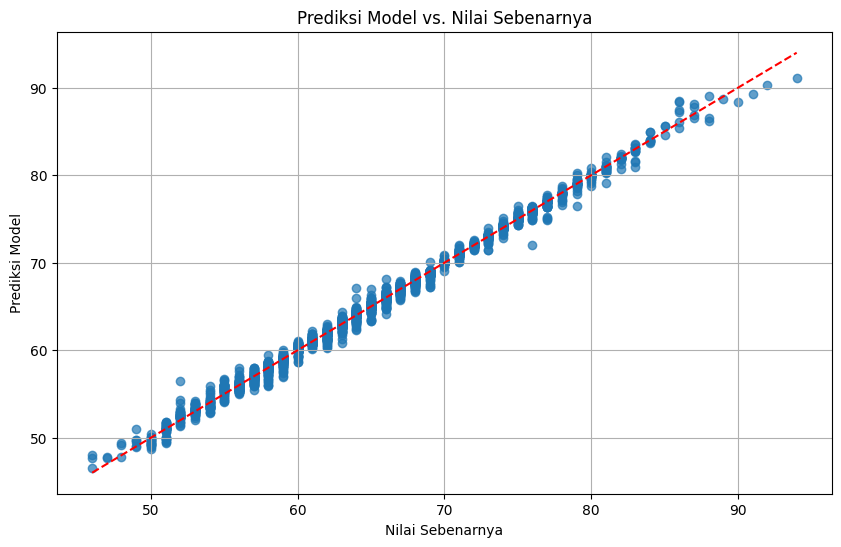

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi Model')
plt.title('Prediksi Model vs. Nilai Sebenarnya')
plt.grid(True)
plt.show()

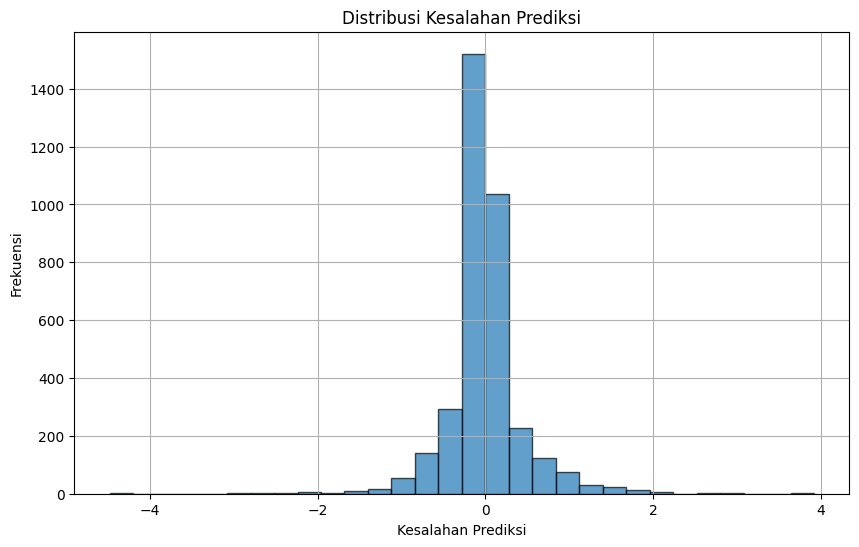

In [71]:
#Histogram untuk menampilkan distribusi kesalahan prediksi
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Kesalahan Prediksi')
plt.ylabel('Frekuensi')
plt.title('Distribusi Kesalahan Prediksi')
plt.grid(True)
plt.show()

# **Prediksi Performa Berdasarkan Usia**

In [72]:
#Memprediksi performa Cristiano Ronaldo di usia 40 tahun
def predict_performance_by_name(name, age):
    player_data = subset_data[subset_data['name'] == name].iloc[0]
    return rf_model.predict([[age, player_data['height_cm'], player_data['weight_kg'], player_data['eur_value'],
                              player_data['potential'], player_data['pac'], player_data['sho'], player_data['pas'],
                              player_data['dri'], player_data['def'], player_data['phy']]])[0]

player_name = 'Cristiano Ronaldo'
predicted_performance = predict_performance_by_name(player_name, 40)
print(f'Prediksi Overall Performa untuk {player_name} di Usia 40 Tahun : {predicted_performance}')

Prediksi Overall Performa untuk Cristiano Ronaldo di Usia 40 Tahun : 91.07


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

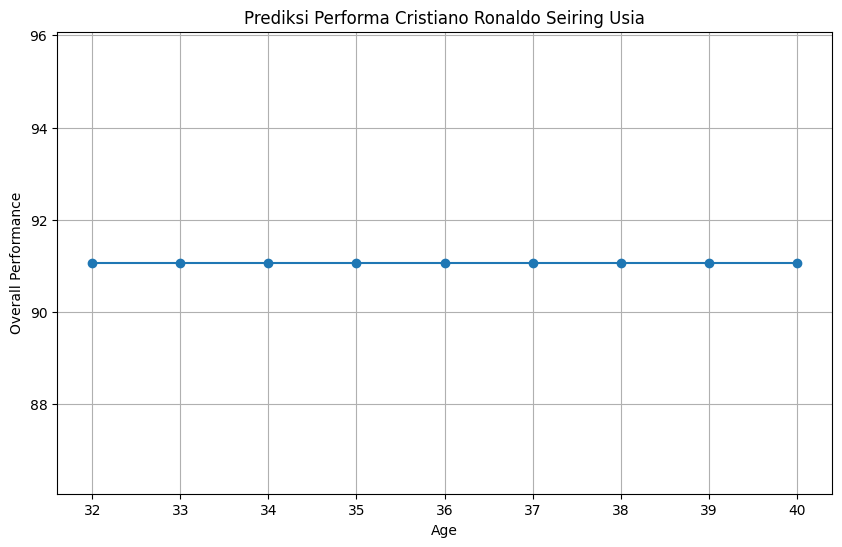

In [73]:
#Memprediksi Performa pada rentang usia
def plot_performance_over_age(name, start_age, end_age):
    ages = list(range(start_age, end_age + 1))
    performa = [predict_performance_by_name(name, age) for age in ages]

    # Plotting Performa seiring bertambahnya usia
    plt.figure(figsize=(10, 6))
    plt.plot(ages, performa, marker='o')
    plt.title(f'Prediksi Performa {name} Seiring Usia')
    plt.xlabel('Age')
    plt.ylabel('Overall Performance')
    plt.grid(True)
    plt.show()

#Plotting performa Cristiano Ronaldo dari usia 32 hingga 40 tahun
plot_performance_over_age(player_name, 32, 40)